In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('master.csv')

# List of columns to exclude
exclude = ['Player', 'PTS', 'Draft Team', 'Round', 'Pick', 'Draft Year', 'Draft College', 'Season', 'Team', 'Pos', 'Class', 'yr1.Team', 'yr1.Pos', 'yr2.Team', 'yr2.Pos', 'yr3.Team', 'yr3.Pos']
# Need to discuss POS and whether or not its a feature we want

# Drop the excluded columns
df_selected = df.drop(columns=exclude)

# Create dummy variables for the 'Pos' column
pos_dummies = pd.get_dummies(df['Pos'], prefix='Pos')

# Concatenate the dummy variables with the selected features
df_selected = pd.concat([df_selected, pos_dummies], axis=1)

# Handle missing values, fill with -1 to distinguish not playing
df_selected = df_selected.fillna(-1)

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

/opt/miniconda3/envs/new_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/new_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/new_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/new_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

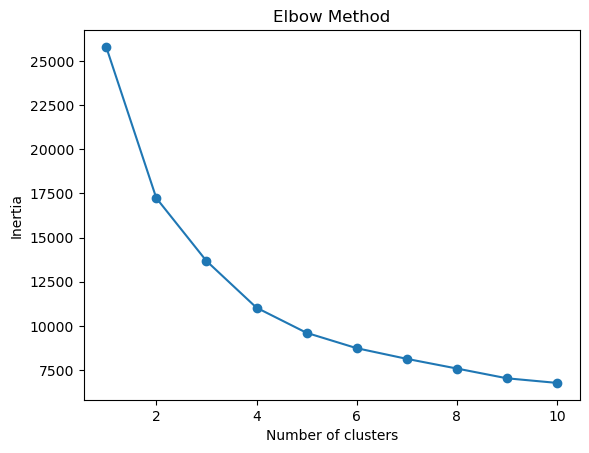

In [5]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

/opt/miniconda3/envs/new_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


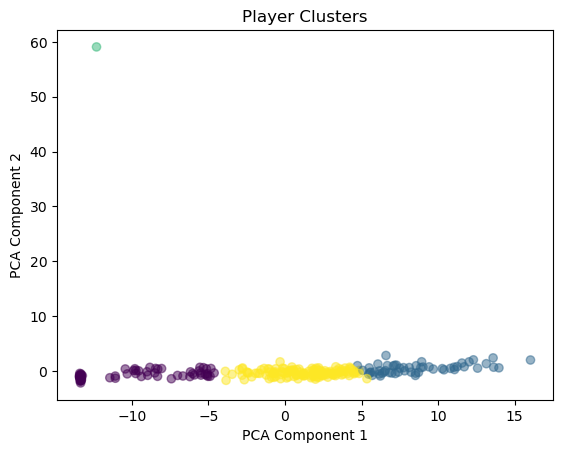

In [ ]:
# Based on the Elbow Method, choose a number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Visualize clusters using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Player Clusters')
plt.show()


In [8]:
# Analyze cluster centers

# Get cluster centers in the scaled feature space
cluster_centers_scaled = kmeans.cluster_centers_

# Inverse transform the cluster centers to the original feature space
cluster_centers = scaler.inverse_transform(cluster_centers_scaled)

# Convert to a DataFrame for better readability
cluster_centers_df = pd.DataFrame(cluster_centers, columns=df_selected.columns)
print(cluster_centers_df)

           G         GS          MP          FG         FGA          2P  \
0  31.253968  28.809524   31.263492    5.430159   11.557143    3.944444   
1  32.444444  30.185185   31.414815    5.677778   11.577778    4.261111   
2  32.000000  32.000000  825.000000  147.000000  255.000000  147.000000   
3  30.861538  27.869231   30.461538    5.297692   10.914615    3.887692   

          2PA        3P       3PA         FT  ...   yr3.TRB   yr3.AST  \
0    7.592063  1.484127  3.961905   3.115873  ... -0.947619 -0.973016   
1    7.790741  1.414815  3.781481   3.396296  ...  4.964815  3.337037   
2  252.000000  0.000000  3.000000  71.000000  ... -1.000000 -1.000000   
3    7.190769  1.410000  3.726154   3.050769  ...  2.880769  1.374615   

    yr3.STL   yr3.BLK   yr3.TOV    yr3.PF    yr3.PTS         Pos_C     Pos_F  \
0 -0.982540 -0.982540 -0.974603 -0.960317  -0.923810  4.761905e-02  0.365079   
1  0.901852  0.581481  1.805556  2.190741  15.511111  1.387779e-17  0.444444   
2 -1.000000 -1.000

In [11]:
# Group by cluster and calculate mean values for numeric columns only
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)
# Export to CSV
cluster_summary.to_csv('output.csv', index=False)

                PTS     Round       Pick   Draft Year          G         GS  \
Cluster                                                                       
0        485.412698  1.793651  40.904762  2019.047619  31.253968  28.809524   
1        524.944444  1.055556  12.777778  2018.722222  32.444444  30.185185   
2        365.000000  2.000000  59.000000  2019.000000  32.000000  32.000000   
3        466.207692  1.515385  32.161538  2019.076923  30.861538  27.869231   

                 MP          FG         FGA          2P  ...   yr3.FT%  \
Cluster                                                  ...             
0         31.263492    5.430159   11.557143    3.944444  ...  0.800000   
1         31.414815    5.677778   11.577778    4.261111  ...  0.779472   
2        825.000000  147.000000  255.000000  147.000000  ...       NaN   
3         30.461538    5.297692   10.914615    3.887692  ...  0.740383   

          yr3.ORB   yr3.DRB   yr3.TRB   yr3.AST   yr3.STL   yr3.BLK   yr3.TOV  \

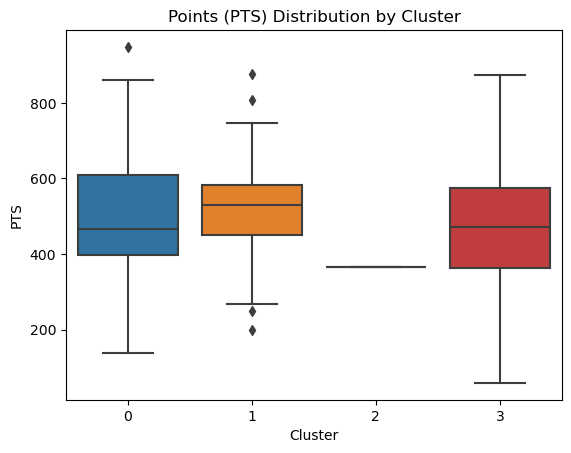

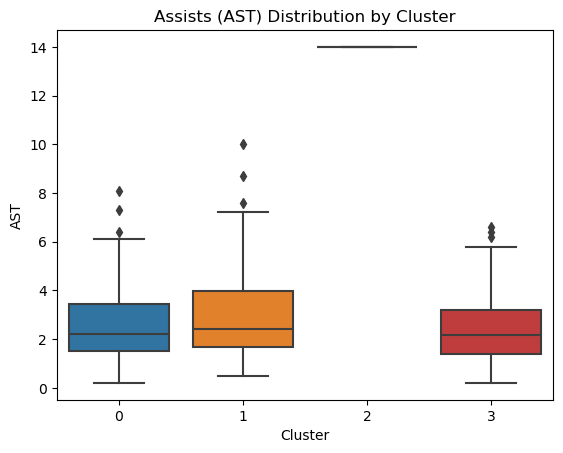

In [12]:
import seaborn as sns

# Example: Boxplot of PTS by cluster
sns.boxplot(x='Cluster', y='PTS', data=df)
plt.title('Points (PTS) Distribution by Cluster')
plt.show()

# Example: Boxplot of AST by cluster
sns.boxplot(x='Cluster', y='AST', data=df)
plt.title('Assists (AST) Distribution by Cluster')
plt.show()